In [279]:
# -*- coding: utf-8 -*-


## importation des modules
import numpy as np
import matplotlib.pyplot as plt
from time import perf_counter_ns
#from collections import deque
from heapdict import heapdict
from math import sqrt
import csv

In [280]:
## lecture données depuis Gduree.csv

MatriceDuree = np.loadtxt("Gduree.csv",
                delimiter=',',
                skiprows=1,
                usecols=range(1, 51),
                dtype=float,
                encoding="UTF-8").tolist()

In [281]:
MatriceDuree[0][0]

0.0

In [282]:
villes = np.loadtxt( "Gduree.csv",
                delimiter=',',
                skiprows=1,
                usecols=range(1, 51),
                dtype='str',
                encoding="UTF-8").tolist()

with open("Gduree.csv", "r", encoding="UTF-8") as f:
    reader = csv.reader(f)
    premiere_ligne = next(reader)
    villes_noms = [nom.strip() for nom in premiere_ligne if nom.strip() != ""]

In [283]:
villes[0]

['0.0',
 '0.0',
 '0.0',
 '0.0',
 '0.0',
 '61.0',
 '0.0',
 '0.0',
 '0.0',
 '0.0',
 '0.0',
 '0.0',
 '0.0',
 '0.0',
 '0.0',
 '0.0',
 '0.0',
 '0.0',
 '100.5',
 '77.5',
 '0.0',
 '0.0',
 '0.0',
 '0.0',
 '0.0',
 '0.0',
 '0.0',
 '0.0',
 '0.0',
 '0.0',
 '0.0',
 '0.0',
 '0.0',
 '81.5',
 '0.0',
 '0.0',
 '0.0',
 '90.5',
 '0.0',
 '0.0',
 '0.0',
 '64.8',
 '0.0',
 '0.0',
 '0.0',
 '0.0',
 '0.0',
 '0.0',
 '0.0',
 '72.5']

In [284]:
G = {} # Graphe sous forme de Liste d'adjacence

In [285]:
for i in range(len(MatriceDuree)):
    G[villes_noms[i]] = []
    for j in range(len(MatriceDuree)):
        cout = MatriceDuree[i][j]
        if cout > 0:
            G[villes_noms[i]].append((villes_noms[j], cout))

In [286]:
G['Lille']

[('Amiens', 77.5),
 ('Calais', 62.5),
 ('Dunkerque', 51.0),
 ('Paris', 119.0),
 ('Reims', 106.0),
 ('Valenciennes', 35.0)]

In [287]:
G['Lille'][0]

('Amiens', 77.5)

In [288]:
X, Y = np.loadtxt("coordonnes.csv",
                delimiter=',',
                skiprows=1,
                usecols=(1,2),
                encoding="UTF-8",
                unpack=True).tolist()

In [289]:
X[0] # X pour la première ville

-53.86351609651101

In [290]:
Y[0] # Y pour la première ville

377.11855555555553

In [291]:
coordonnees = {}
for i, ville in enumerate(villes_noms):
    coordonnees[ville] = (X[i], Y[i])

In [292]:
villes_noms[0]

'Amiens'

In [293]:
coordonnees["Bordeaux"]

(-273.74943669239667, -184.69011111111104)

In [294]:
# Définition de la fonction de visualisation de la priorité associée aux villes visitées
def representationVisite(SommetsVisites,depart,echelle, typeAlgo):
    plt.figure(typeAlgo + ", depuis " + depart) 
    for ville, priorite in SommetsVisites:
        x, y = coordonnees[ville]
        plt.plot(x, y, 'ro', ms=echelle*priorite/100)  # echelle% * priorité(min)=taille du cercle
        plt.text(x, y, ville, va="center", ha="center")
    plt.show()

In [295]:
## déclaration des fonctions
def DureeDijkstra(G, depart, arrivee): # arguments : (le graphe, le nom de la vile de départ, le nom de la ville d'arrivée)
    SommetsVisites = []  # liste des (ville, priorité) visités dans l'ordre
    filePriorite = heapdict()  # instanciation vide de filePriorite
    duree_min = {}  # dictionnaire des durées min
    visited = set()  # ensemble des sommets définitivement traités
    prev = {}  # pour reconstruire le chemin

    # Initialisation : distances infinies et clé infinie dans la file
    for sommet in G.keys():  # Pour tous les sommets du graphe
        duree_min[sommet] = float("inf")
        filePriorite[sommet] = float("inf")
        prev[sommet] = None

    # Départ
    if depart not in G or arrivee not in G:
        raise KeyError("Le sommet de départ ou d'arrivée n'existe pas dans le graphe")

    duree_min[depart] = 0.0  # La durée du sommet de départ à 0
    filePriorite[depart] = 0.0  # priorité du sommet de départ à 0 (minimum)

    # Boucle principale
    while len(filePriorite) > 0:  # tant que la file de priorité n'est pas vide
        sommet_courant, priorite = filePriorite.popitem()  # retirer le sommet de priorité minimale

        # Si ce sommet a déjà été définitivement traité, l'ignorer (protection)
        if sommet_courant in visited:
            continue

        # Marquer comme visité
        visited.add(sommet_courant)
        SommetsVisites.append((sommet_courant, priorite))

        # Si on est arrivé à la destination, on peut reconstruire le chemin et sortir
        if sommet_courant == arrivee:
            chemin = []
            noeud = arrivee
            while noeud is not None:
                chemin.append(noeud)
                noeud = prev.get(noeud)
            chemin.reverse()
            return duree_min, SommetsVisites, chemin

        # Relaxation des arcs sortants
        for sommetAdj, poids in G.get(sommet_courant, []):  # (successeur, poids)
            if sommetAdj in visited:
                continue
            d = duree_min[sommet_courant] + poids  # durée alternative
            if d < duree_min[sommetAdj]:  # si amélioration
                duree_min[sommetAdj] = d  # mise à jour de la durée minimale
                prev[sommetAdj] = sommet_courant  # enregistrer le prédécesseur
                filePriorite[sommetAdj] = d  # mise à jour de la priorité dans la file

    # Si la destination n'a pas été atteinte, reconstruire chemin si possible
    if duree_min.get(arrivee, float('inf')) < float('inf'):
        chemin = []
        noeud = arrivee
        while noeud is not None:
            chemin.append(noeud)
            noeud = prev.get(noeud)
        chemin.reverse()
    else:
        chemin = []

    # Renvoyer distances, liste des visites et chemin
    return duree_min, SommetsVisites, chemin

Temps de calcul Reims -> Bordeaux : 0.000329833 s
durée minimale (minutes): 382.0
chemin trouvé : ['Reims', 'Paris', 'Orléans', 'Tours', 'Bordeaux']
liste des noeuds visités : [('Reims', 0.0), ('Troyes', 61.6), ('Paris', 75.0), ('Amiens', 90.5), ('Metz', 94.0), ('Valenciennes', 95.0), ('Lille', 106.0), ('Nancy', 117.0), ('Calais', 138.5), ('Orléans', 146.5), ('Boulogne-sur-Mer', 151.5), ('Rouen', 155.3), ('Dunkerque', 157.0), ('Beaune', 172.7), ('Strasbourg', 178.0), ('Le Mans', 183.5), ('Besançon', 189.7), ('Le Havre', 191.0), ('Tours', 202.5), ('Caen', 204.0), ('Bourges', 216.0), ('Mulhouse', 239.5), ('Lyon', 251.2), ('Poitiers', 257.5), ('Rennes', 265.0), ('Limoges', 280.0), ('Nantes', 282.0), ('Cherbourg-Octeville', 287.0), ('Saint-Étienne', 287.2), ('Genève', 293.1), ('Clermont-Ferrant', 293.5), ('Valence', 305.7), ('Chambéry', 312.2), ('Grenoble', 312.7), ('Brive-la-Gaillarde', 326.1), ('La Rochelle', 334.5), ('Orange', 356.2), ('Bordeaux', 382.0)]


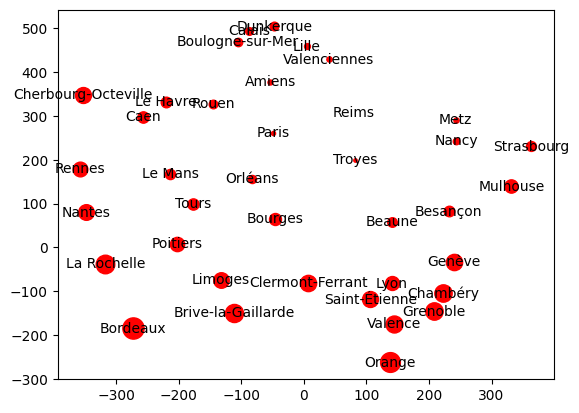

Temps de calcul Bordeaux -> Reims : 0.0003355 s
durée minimale (minutes): 382.0
chemin trouvé : ['Bordeaux', 'Tours', 'Orléans', 'Paris', 'Reims']
liste des noeuds visités : [('Bordeaux', 0.0), ('La Rochelle', 95.5), ('Bayonne', 99.0), ('Brive-la-Gaillarde', 107.1), ('Toulouse', 122.5), ('Pau', 151.0), ('Limoges', 153.2), ('Poitiers', 153.5), ('Tours', 179.5), ('Nantes', 185.0), ('Narbonne', 200.5), ('Clermont-Ferrant', 214.7), ('Rodez', 228.0), ('Orléans', 235.5), ('Le Mans', 235.5), ('Perpignan', 237.0), ('Rennes', 249.0), ('Nîmes', 269.0), ('Bourges', 274.0), ('Saint-Étienne', 289.2), ('Orange', 297.0), ('Paris', 307.0), ('Lyon', 325.2), ('Marseille', 332.5), ('Caen', 336.0), ('Troyes', 337.6), ('Rouen', 344.3), ('Valence', 347.5), ('Toulon', 363.5), ('Le Havre', 364.0), ('Brest', 368.0), ('Chambéry', 373.2), ('Grenoble', 373.7), ('Reims', 382.0)]


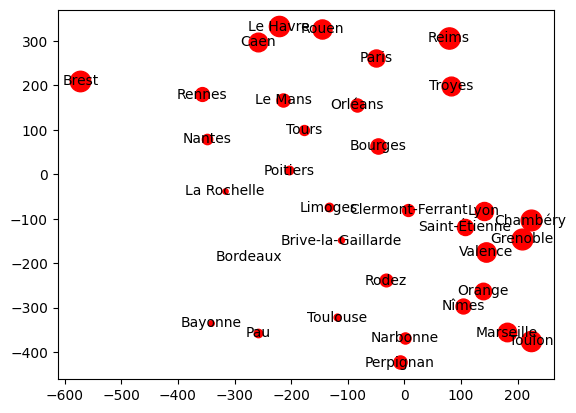

In [296]:
######## Dijkstra entre Reims et Bordeaux
depart = "Reims"
arrivee = "Bordeaux"
tic = perf_counter_ns()
# Exécution unique de l'algorithme
duree_min, ListeSommetsVisites, chemin = DureeDijkstra(G, depart, arrivee)
toc = perf_counter_ns()
print("Temps de calcul Reims -> Bordeaux :", (toc - tic) * 1e-9, "s")
print("durée minimale (minutes):", duree_min.get(arrivee, float('inf')))
print("chemin trouvé :", chemin)
print("liste des noeuds visités :", ListeSommetsVisites)
representationVisite(ListeSommetsVisites, depart, 4, "Dijkstra")

######## Dijkstra entre Bordeaux et Reims (sens inverse)
depart = "Bordeaux"
arrivee = "Reims"
tic = perf_counter_ns()
# Exécution unique de l'algorithme
duree_min, ListeSommetsVisites, chemin = DureeDijkstra(G, depart, arrivee)
toc = perf_counter_ns()
print("Temps de calcul Bordeaux -> Reims :", (toc - tic) * 1e-9, "s")
print("durée minimale (minutes):", duree_min.get(arrivee, float('inf')))
print("chemin trouvé :", chemin)
print("liste des noeuds visités :", ListeSommetsVisites)
representationVisite(ListeSommetsVisites, depart, 4, "Dijkstra")

In [297]:
tic = perf_counter_ns()
for i in range(1000):
    DureeDijkstra(G, "Reims", "Bordeaux")
toc = perf_counter_ns()

duree_totale_s = (toc - tic) * 1e-9
print("Durée pour 1000 trajets :", duree_totale_s, "s")

Durée pour 1000 trajets : 0.27602645800000003 s


Question 14 :

Concrètement, si on cherche un chemin de Reims vers Bordeaux (situé au Sud-Ouest), Dijkstra va également explorer des villes situées à l'opposé (comme Lille ou Strasbourg) simplement parce qu'elles sont proches de Reims en termes de durée. L'algorithme traite chaque direction avec la même priorité tant que la durée cumulée est faible, sans tenir compte de la position géographique de la destination.

L'algorithme de Dijkstra ne repose que sur la distance déjà parcourue (g(v)) depuis le point de départ. Il cherche à minimiser uniquement le coût réel accumulé. Il est "aveugle" à la position de l'objectif final; il ne possède aucune information sur la direction à prendre pour se rapprocher de l'arrivée.

Pour corriger ce défaut, l'approche proposée est d'utiliser l'algorithme A*, qui est une version "informée" de Dijkstra.

    - L'idée centrale : Ajouter une fonction heuristique h(v) qui permet d'orienter la recherche « dans la bonne direction ».

    - Le fonctionnement : Au lieu de classer les sommets uniquement par la distance parcourue, A* utilise une estimation du coût total f(v)=g(v)+h(v).

    - L'heuristique : Dans ce TP, on utilise la distance à vol d'oiseau (distance euclidienne) entre le nœud courant et la cible. Cette fonction doit être admissible, c'est-à-dire qu'elle ne doit jamais surestimer le coût réel pour atteindre l'arrivée (h(v)≤h∗(v)).

In [298]:
#Algo A*

In [299]:
def DureeAetoile(G, depart, arrivee, heuristique_func):
    SommetsVisites = []
    filePriorite = heapdict()
    
    # Coût réel pour aller du départ au sommet v
    g_score = {sommet: float('inf') for sommet in G}
    g_score[depart] = 0
    
    # f_score = g_score + h (priorité dans la file)
    filePriorite[depart] = g_score[depart] + heuristique_func(depart)
    
    predecesseurs = {sommet: None for sommet in G}
    
    while len(filePriorite) > 0:
        # On extrait le noeud avec le f_score le plus bas
        u, f_u = filePriorite.popitem()
        
        # On garde trace de la visite (pour la visualisation)
        SommetsVisites.append((u, g_score[u]))
        
        if u == arrivee:
            break
            
        for v, poids in G[u]:
            tentative_g_score = g_score[u] + poids
            
            if tentative_g_score < g_score[v]:
                predecesseurs[v] = u
                g_score[v] = tentative_g_score
                # Mise à jour de la priorité : f(v) = g(v) + h(v)
                filePriorite[v] = g_score[v] + heuristique_func(v)
                
    return g_score[arrivee], SommetsVisites, predecesseurs

In [300]:
def VolOiseau(ville1, ville2):
    # Récupération des coordonnées depuis ton dictionnaire 'coordonnees'
    x1, y1 = coordonnees[ville1]
    x2, y2 = coordonnees[ville2]
    
    # Distance euclidienne en degrés
    distance_deg = np.sqrt((x2 - x1)**2 + (y2 - y1)**2)
    
    # Conversion en km (1 degré approx. 111 km)
    return distance_deg

Pour que l'addition dans la formule de priorité f(v)=g(v)+h(v) soit cohérente, tous les termes doivent avoir la même unité.

g(v) (duree_min) est exprimé en minutes.

VolOiseau(ville, arrivee) est une distance (calculée à partir des coordonnées, souvent assimilée à des km ou des degrés).

La dimension de k doit donc être l'inverse d'une vitesse : des minutes par kilomètre (min/km) ou des minutes par unité de coordonnée. Elle représente le temps nécessaire pour parcourir une unité de distance.

In [301]:
def h(ville1, ville2):
    #return 0
    #temps en minutes par km à 90km/h
    k = 60 / 90  # conversion de l'heure en minutes
    #k = 60/90 signifie qu'on estime voyager à 90 km/h (0.66 min/km). 
    return k * VolOiseau(ville1, ville2)

In [302]:
## programmes principaux A*

Temps de calcul entre tic et toc :  0.048315542 s
durée minimale :  382.0
liste des noeuds visités  [('Reims', 0), ('Paris', 75.0), ('Orléans', 146.5), ('Limoges', 280.0), ('Tours', 202.5), ('Bordeaux', 382.0)]


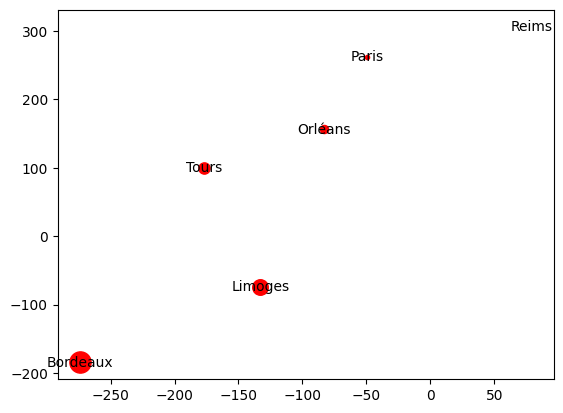

In [303]:
######## A* entre entre Reims et Bordeaux
depart="Reims"
arrivee="Bordeaux"
heuristique = lambda v: h(v, arrivee)
tic = perf_counter_ns()
# code dont il faut vérifier la performance
for i in range(1000):
    duree_min, ListeSommetsVisites, predecesseurs = DureeAetoile(G, depart, arrivee, heuristique)
toc = perf_counter_ns()

print("Temps de calcul entre tic et toc : ", (toc - tic)*1e-9, "s")
print("durée minimale : ",duree_min)
print("liste des noeuds visités ", ListeSommetsVisites)
representationVisite(ListeSommetsVisites,depart, 4, 'A_etoile')

In [304]:
def representationCheminOpt(CheminOptimal, echelle):
    for i in range(len(CheminOptimal) - 1):
        v1 = CheminOptimal[i]
        v2 = CheminOptimal[i+1]
        x1, y1 = coordonnees[v1]
        x2, y2 = coordonnees[v2]
        # Trace une ligne bleue entre deux villes successives
        plt.plot([x1, x2], [y1, y2], 'b-', lw=2)
    plt.show()

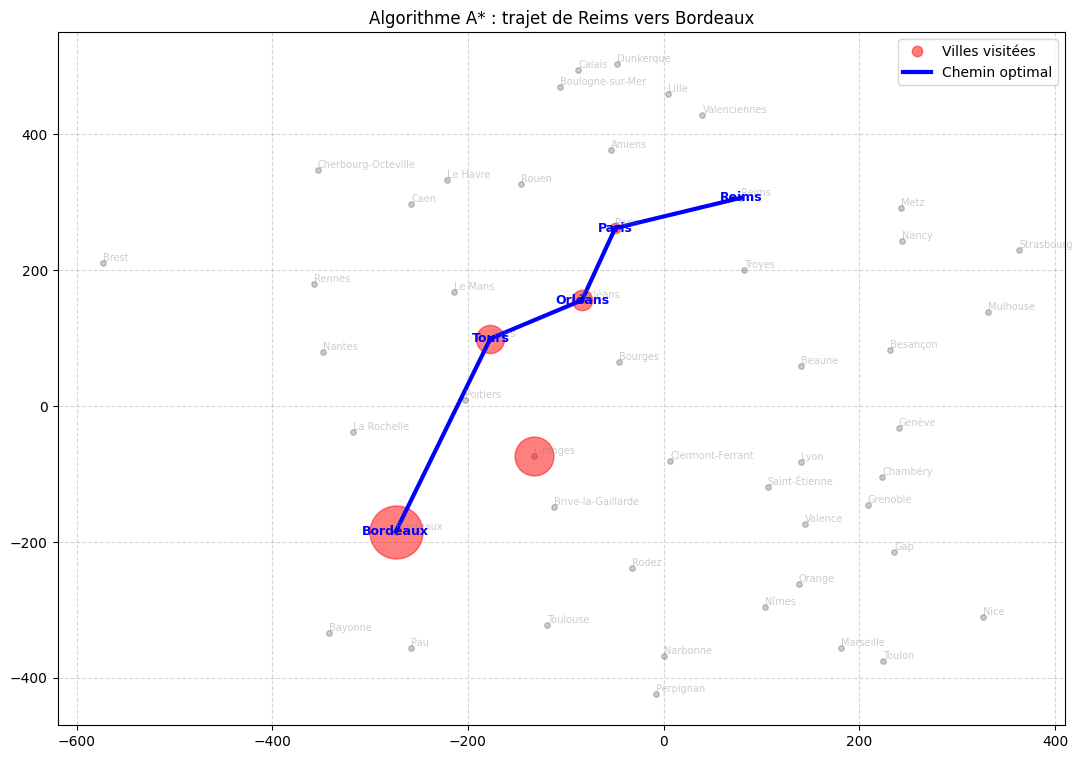

Distance minimale trouvée : 382.0 minutes
Étapes : Reims -> Paris -> Orléans -> Tours -> Bordeaux


In [320]:
chemin_opt = []
actuel = arrivee
while actuel is not None:
    chemin_opt.append(actuel)
    actuel = predecesseurs.get(actuel)
chemin_opt.reverse()

# --- INITIALISATION DE LA FIGURE ---
plt.figure(figsize=(13, 9))
plt.title(f"Algorithme A* : trajet de {depart} vers {arrivee}")

# A. Affichage de TOUTES les villes du réseau (en gris clair)
for ville in villes_noms:
    x, y = coordonnees[ville]
    plt.plot(x, y, 'ko', ms=4, alpha=0.2) # Petits points noirs transparents
    plt.text(x, y, ville, fontsize=7, color='grey', alpha=0.4, va='bottom')

# B. Affichage des villes VISITÉES par A* (cercles rouges)
# On réutilise la logique de representationVisite mais directement ici pour la superposition
for ville, priorite in ListeSommetsVisites:
    x, y = coordonnees[ville]
    plt.plot(x, y, 'ro', ms=4 * priorite / 40, alpha=0.5, label="Villes visitées" if ville == ListeSommetsVisites[1][0] else "")

# C. Affichage du CHEMIN OPTIMAL (lignes bleues et texte gras)
for i in range(len(chemin_opt) - 1):
    v1, v2 = chemin_opt[i], chemin_opt[i+1]
    x1, y1 = coordonnees[v1]
    x2, y2 = coordonnees[v2]
    plt.plot([x1, x2], [y1, y2], 'b-', lw=3, label="Chemin optimal" if i==0 else "")
    # On met en avant les noms des villes du chemin
    plt.text(x1, y1, v1, color='blue', fontweight='bold', fontsize=9, va='center', ha='center')

# On n'oublie pas le nom de la ville d'arrivée
xa, ya = coordonnees[arrivee]
plt.text(xa, ya, arrivee, color='blue', fontweight='bold', fontsize=9, va='center', ha='center')

plt.grid(True, linestyle='--', alpha=0.5)
plt.legend()
plt.show()

print(f"Distance minimale trouvée : {duree_min} minutes")
print(f"Étapes : {' -> '.join(chemin_opt)}")